# Data pre-proceesing

### Introduction
The data preprocessing is one of the most crucial steps in the machine learning process, here I will explain my preprocessing steps 

## Data import 

In [1]:
# import pandas
import pandas as pd
import numpy as np

In [2]:
dialects_data = pd.read_csv('inputs/dialcets_data.csv')
dialects_data.head()

,id,tweet,dialect
0,1.175360e+18,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,IQ
1,1.175420e+18,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,IQ
2,1.175450e+18,@KanaanRema مبين من كلامه خليجي,IQ
3,1.175470e+18,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,IQ
4,1.175500e+18,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,IQ


### Dataset balance visualization

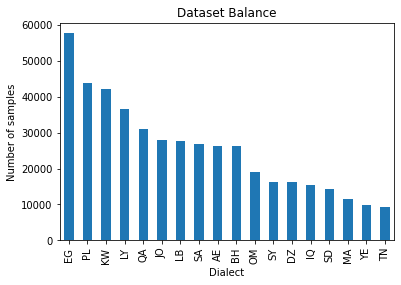

In [3]:
import matplotlib.pyplot as plt
classes_num = dialects_data['dialect'].value_counts().plot(kind = 'bar',
                                                          title = 'Dataset Balance',
                                                          xlabel = 'Dialect',
                                                          ylabel = 'Number of samples')

In [4]:
# Merge gulf dialcets
dialects_data['dialect'].replace(['SA', 'AE', 'QA', 'BH', 'KW', 'OM', 'IQ'], 'GUL', inplace=True)
# Merge noth african countries (Except for egyptyian)
dialects_data['dialect'].replace(['LIB', 'DZ', 'MA', 'TN', 'LY'], 'NA', inplace=True)
# Merge Levantine countries
dialects_data['dialect'].replace(['SY', 'PL', 'JO', 'LB'], 'LV', inplace=True)

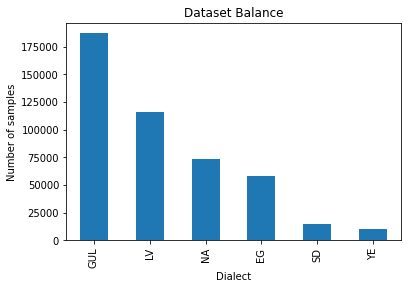

In [5]:
classes_num = dialects_data['dialect'].value_counts().plot(kind = 'bar',
                                                          title = 'Dataset Balance',
                                                          xlabel = 'Dialect',
                                                          ylabel = 'Number of samples')

## Data pre-processing 
### Drop uncessary features 
Remove IDs column from the data because it is not useful going forward.

In [6]:
dialects_data.drop('id', axis = 1, inplace = True)
dialects_data.head(1)

,tweet,dialect
0,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,GUL


### Merge similar dilacets

### Undersampling 

In [7]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy={'GUL': 50000, 'LV': 50000, 'EG': 50000, 'NA': 50000})
X_under, y_under = undersample.fit_resample(dialects_data['tweet'].values.reshape(-1, 1), dialects_data['dialect'])

In [8]:
X_under = pd.Series(X_under.ravel())

In [9]:
#Create new dataframe to house under sampled data
under_sampled_data = pd.concat([X_under, y_under], axis = 1)
under_sampled_data.rename(columns={0: 'tweet'}, inplace = True)
display(under_sampled_data.head())

,tweet,dialect
0,انهارده درجه الحراره 40 و الجو موت\nبعد كدا ال...,EG
1,@9Dr_RU_ALEX_998 هي متعودة علي النجاسة,EG
2,#صاحب_تويتر_وفولورز_الاتنين والتلات كمان,EG
3,فالواقع انا ما ارتبطش قبل كده فالطبيعي عندي ان...,EG
4,@noha_shaaban ماقدرش أنكِر ان فيه بنات بتسوق ك...,EG


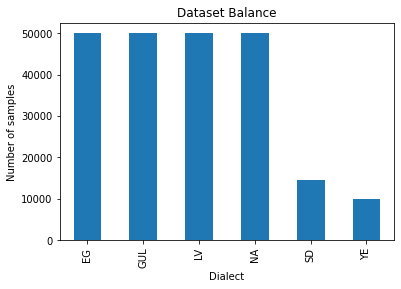

In [10]:
classes_num = under_sampled_data['dialect'].value_counts().plot(kind = 'bar',
                                                          title = 'Dataset Balance',
                                                          xlabel = 'Dialect',
                                                          ylabel = 'Number of samples')

### Drop minority classes

In [11]:
under_sampled_data.drop(under_sampled_data.loc[under_sampled_data['dialect']=='YE'].index, inplace=True)
#under_sampled_data.drop(under_sampled_data.loc[under_sampled_data['dialect']=='IQ'].index, inplace=True)
under_sampled_data.drop(under_sampled_data.loc[under_sampled_data['dialect']=='SD'].index, inplace=True)

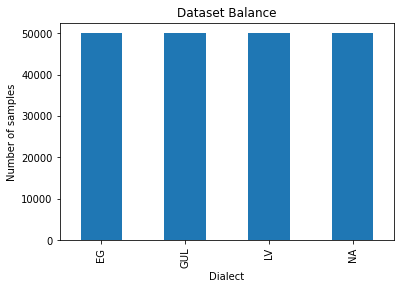

In [12]:
classes_num = under_sampled_data['dialect'].value_counts().plot(kind = 'bar',
                                                          title = 'Dataset Balance',
                                                          xlabel = 'Dialect',
                                                          ylabel = 'Number of samples')

### Remove unwanted characters

In [13]:
import re
def preprocess_text(tweet):
    #tweet = re.sub('/#\w+\s*[A-Za-z]+\b','',tweet) # Remove hashtags
    tweet = re.sub('@[^\s]+','',tweet) # Remove user name and mentions
    tweet = re.sub('http[^\s]+','',tweet) # Remove Hyper links
    tweet = re.sub('[^\w\s#@/:%.,_-]','',tweet) # Remove emojis
    tweet = re.sub('\d+','',tweet) # Remove numbers
    tweet = re.sub('[^\w\s]','',tweet) # Remove punctuation
    tweet = re.sub(r'[a-zA-Z]','',tweet, flags=re.I) # Remove english words and add flag to remove dotlees i
    tweet = re.sub(r'[\_-]', '', tweet) # Remove underscores and dashes
    tweet = re.sub(r'\n', '', tweet)
    tweet = tweet.rstrip()
    return tweet

In [14]:
under_sampled_data['tweet'] = under_sampled_data['tweet'].apply(preprocess_text)

In [15]:
under_sampled_data.head()

,tweet,dialect
0,انهارده درجه الحراره و الجو موتبعد كدا اللي ه...,EG
1,هي متعودة علي النجاسة,EG
2,صاحبتويتروفولورزالاتنين والتلات كمان,EG
3,فالواقع انا ما ارتبطش قبل كده فالطبيعي عندي ان...,EG
4,ماقدرش أنكر ان فيه بنات بتسوق كويس ويمكن أحسن...,EG


### Normalize

In [16]:
#library for text normalization
import tashaphyne.normalize as normalize
def normalizeArabic(tweet):
    return normalize.normalize_searchtext(tweet)

In [17]:
under_sampled_data['tweet'] = under_sampled_data['tweet'].apply(normalizeArabic)
print(under_sampled_data['tweet'].loc[0:5])

0    انهارده درجه الحراره  و الجو موتبعد كدا اللي ه...
1                                هي متعوده علي النجاسه
2                 صاحبتويتروفولورزالاتنين والتلات كمان
3    فالواقع انا ما ارتبطش قبل كده فالطبيعي عندي ان...
4     ماقدرش انكر ان فيه بنات بتسوق كويس ويمكن احسن...
5    يالي بتسال عن الحياه خدها كدا زي ماهيااافيها ا...
Name: tweet, dtype: object


### Remove names from tweets using names scraped by ZakAhmed
Link to ZakAhmed's GitHub repository: https://github.com/zakahmad/ArabicNameGenderFinder

In [18]:
male_names = pd.read_csv('inputs/males_ar.csv')
female_names = pd.read_csv('inputs/females_ar.csv')
# Concat noth gender names
arabic_names = pd.concat([male_names, female_names])
# drop gender column
arabic_names.drop('Gender', axis = 1, inplace = True)

In [19]:
# Normalize names
arabic_names['Name'] = arabic_names['Name'].apply(normalizeArabic)
# Put names in a list
names_list = arabic_names.values.ravel()
names_list

array(['ادم', 'اسر', 'ابد', ..., 'يقظانه', 'يمامه', 'يمني'], dtype=object)

In [20]:
# Remove names from tweets
under_sampled_data['tweet'] = under_sampled_data['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (names_list)]))

In [21]:
under_sampled_data.head()

,tweet,dialect
0,انهارده درجه الحراره و الجو موتبعد كدا اللي هي...,EG
1,هي متعوده علي النجاسه,EG
2,صاحبتويتروفولورزالاتنين والتلات كمان,EG
3,فالواقع انا ما ارتبطش قبل كده فالطبيعي عندي ان...,EG
4,ماقدرش انكر ان فيه بنات بتسوق كويس ويمكن من رج...,EG


### Stop words removal 

In [22]:
import nltk
arab_stopwords = set(nltk.corpus.stopwords.words("arabic"))

In [23]:
additional_stopwords = {'بس','يوم','ﻣﺎ','و', 'ﻣﻦ', 'ﻓﻲ', 'الي', 'يونيو','اب', 'ام','اه','ابريل','هو','هي','اللي','يا','لما','لو','لذلك'}
joint_stop_words = arab_stopwords.union(additional_stopwords)

In [24]:
len(joint_stop_words)

712

In [25]:
under_sampled_data['tweet'] = under_sampled_data['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (joint_stop_words)]))

In [26]:
under_sampled_data.head()

,tweet,dialect
0,انهارده درجه الحراره الجو موتبعد كدا هيجي يقول...,EG
1,متعوده علي النجاسه,EG
2,صاحبتويتروفولورزالاتنين والتلات كمان,EG
3,فالواقع انا ارتبطش كده فالطبيعي عندي ان ميفرقش...,EG
4,ماقدرش انكر ان بنات بتسوق كويس ويمكن رجاله كتي...,EG


### Text stemming 

In [27]:
from nltk.stem.isri import ISRIStemmer
from snowballstemmer import stemmer
ar_stemmer = stemmer("arabic")

def stemmer(tweet):
    st = ISRIStemmer()
    #newtweet = st.stem(u'{}'.format(tweet))
    newtweet = ar_stemmer.stemWord(tweet)
    return newtweet

under_sampled_data['tweet'] = under_sampled_data['tweet'].apply(stemmer)
under_sampled_data.head()

,tweet,dialect
0,انهارده درجه الحراره الجو موتبعد كدا هيجي يقول...,EG
1,متعوده علي النجاس,EG
2,صاحبتويتروفولورزالاتنين والتلات كم,EG
3,فالواقع انا ارتبطش كده فالطبيعي عندي ان ميفرقش...,EG
4,ماقدرش انكر ان بنات بتسوق كويس ويمكن رجاله كتي...,EG


### Dialects labels encoding 

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

under_sampled_data['dialect'] = le.fit_transform(under_sampled_data['dialect'])

In [29]:
under_sampled_data.head(1)

,tweet,dialect
0,انهارده درجه الحراره الجو موتبعد كدا هيجي يقول...,0


## Data split
Data spliting will occur before the utilisation of bag of words method to ensure that no data leak happens.

In [30]:
tweets = under_sampled_data['tweet']
dialect_target = under_sampled_data['dialect']

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tweets, dialect_target, test_size = 0.2, random_state = 0)

### Bag of words
#### Vectorize training data

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 5000)

In [33]:
train_data_features = vectorizer.fit_transform(x_train)
# Numpy arrays are easy to work with, so convert the result to an array
train_data_features = train_data_features.toarray()

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(train_data_features)
X_train_tfidf.shape

(160000, 5000)

In [35]:
vocab = vectorizer.get_feature_names_out()
vocab

array(['اااه', 'ااه', 'اب', ..., 'يوميا', 'يومين', 'ييجي'], dtype=object)

#### Vectorize test features

In [36]:
test_data_feat = vectorizer.transform(x_test)
final_test = tfidf_transformer.transform(test_data_feat)

## Models (Testing data) 

In [44]:
from datetime import datetime
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

### Random forrest

In [41]:
from sklearn.ensemble import RandomForestClassifier
                                                                      
# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 200,
                                criterion = 'entropy',
                                max_depth = 70,
                                min_samples_split=5)
# Fitting the random forest using the training set
start = datetime.now()
print('Random forrest start time: {}'.format(start))
forest = forest.fit(X_train_tfidf, y_train)
print('Training time: {}'.format(datetime.now() - start))

Random forrest start time: 2022-03-19 19:34:59.604179
Training time: 0:01:18.186096


#### Random forrest evaluation

In [42]:
y_pred_train = forest.predict(train_data_features)
accuracy_score(y_train, y_pred_train.reshape(-1, 1), normalize=True)

0.60720625

In [43]:
y_pred = forest.predict(final_test)
accuracy_score(y_test, y_pred.reshape(-1, 1), normalize = True)

0.570675

### Random forrest using GridSearch

In [45]:
forest_parameters = {'n_estimators':[150,200,250], 'criterion': ['entropy', 'gini'], 
              'min_samples_split':[2, 5, 7], 'max_depth':[10,20,50,90]}

In [ ]:
print('Random forrest with grid search start time: {}'.format(start))
forest_clf = RandomForestClassifier()
best_forest = GridSearchCV(forest_clf, forest_parameters)
best_forest.fit(X_train_tfidf, y_train)
print('Random forrest with grid search training duration: {}'.format(datetime.now() - start))

Random forrest with grid search start time: 2022-03-19 19:34:59.604179


#### Random forest with GridSearch evaluation

In [ ]:
y_pred_train = best_forest.predict(train_data_features)
accuracy_score(y_train, y_pred_train.reshape(-1, 1), normalize=True)

In [ ]:
y_pred = best_forest.predict(final_test)
accuracy_score(y_test, y_pred.reshape(-1, 1), normalize = True)

### SVM

from sklearn import svm
start = datetime.now()

text_clf_svm = svm.SVC()#decision_function_shape ='ovo')
_ = text_clf_svm.fit(X_train_tfidf, y_train)
predicted_svm = text_clf_svm.predict(X_train_tfidf)
print('Training time: {}'.format(datetime.now() - start))

#### Support vector machine evaluation

np.mean(predicted_svm == y_train)

### XGboost classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

start = datetime.now()
print('XGboost start time: {}'.format(start))
clf = GradientBoostingClassifier(n_estimators=200,
                                learning_rate=1e-3,
                                max_depth=40,
                                random_state=0)
# Fit XGboost classifier
clf.fit(X_train_tfidf, y_train)
print('XGboost training duration: {}'.format(datetime.now() - start))

#### XGboost evaluation

In [ ]:
clf.score(X_train_tfidf, y_train)

In [ ]:
clf.score(final_test, y_test)

### XGboost with Grid search hyper parameters tuning

#### Grid search parameters 

In [ ]:
parameters = {'n_estimators':[150,200,250], 'learning_rate':[1e-3, 1e-1,1], 'max_depth':[10,20,50,90]}

In [ ]:
print('XGboost with grid search start time: {}'.format(start))
gbc = GradientBoostingClassifier()
grid_clf = GridSearchCV(svc, parameters)
clf.fit(X_train_tfidf, y_train)
print('XGboost with grid search training duration: {}'.format(datetime.now() - start))